In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.20

In [3]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [5]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="5EjAsHK1xPnI6qNcftxj")

In [6]:
########### Fire Detection Dataset ########################
fire_detection = rf.workspace("inzynierkaogien").project("fire-detection-small")
version = fire_detection.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fire-detection-small-1 in yolov8:: 100%|██████████| 1436/1436 [00:00<00:00, 2645.96it/s]


In [7]:
traffic_sign = rf.workspace("btlcv").project("detect-traffic-sign-yx7bh")
version = traffic_sign.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Detect-Traffic-Sign-6 in yolov8:: 100%|██████████| 13447/13447 [00:07<00:00, 1864.33it/s]


In [8]:
people_detection = rf.workspace("thesis-l1ufi").project("peopledetection-qyok3")
version = people_detection.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PeopleDetection-6 in yolov8:: 100%|██████████| 16160/16160 [00:05<00:00, 3015.50it/s]


In [9]:
gear_detect = rf.workspace("mhch").project("geardetect3")
version = gear_detect.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to geardetect3-3 in yolov8:: 100%|██████████| 635/635 [00:00<00:00, 5206.56it/s]


In [10]:
pizza_detect = rf.workspace("akshay-dilip-kumar-ois4s").project("pizzza-topping")
version = pizza_detect.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to pizzza-topping-1 in yolov8:: 100%|██████████| 1052/1052 [00:00<00:00, 3807.45it/s]


In [11]:
!ls {HOME}

datasets


In [12]:
############## Traffic sign detection training ####################################
%cd {HOME}
!yolo mode=train task=detect model=yolov8s.pt data=/content/datasets/Detect-Traffic-Sign-6/data.yaml epochs=10 name="Traffic_sign" plots=True imgsz=600

/content
100% 21.5M/21.5M [00:00<00:00, 205MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Detect-Traffic-Sign-6/data.yaml, epochs=10, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=Traffic_sign, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [13]:
############## People detection training ####################################
%cd {HOME}
!yolo mode=train task=detect model=yolov8s.pt data=/content/datasets/PeopleDetection-6/data.yaml epochs=10 name="People_detection" plots=True imgsz=600

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/PeopleDetection-6/data.yaml, epochs=10, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=People_detection, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [14]:
############## Fire detection training ####################################
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/fire-detection-small-1/data.yaml name="Fire_detection" epochs=10 imgsz=600 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/fire-detection-small-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=Fire_detection, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, in

In [15]:
####################### Gear detection ############################
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/geardetect3-3/data.yaml epochs=10 name="Gear_detection" imgsz=600 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/geardetect3-3/data.yaml, epochs=10, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=Gear_detection, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

In [16]:
####################### Pizza topping detection ############################
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/pizzza-topping-1/data.yaml epochs=10 name="Pizza_topping" imgsz=600 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/pizzza-topping-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=Pizza_topping, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fals

In [17]:
!ls {HOME}/runs/detect/Fire_detection

args.yaml					     results.csv	    val_batch1_labels.jpg
confusion_matrix.png				     results.png	    val_batch1_pred.jpg
events.out.tfevents.1717070701.5d20429e18dd.17601.0  train_batch0.jpg	    val_batch2_labels.jpg
F1_curve.png					     train_batch1.jpg	    val_batch2_pred.jpg
P_curve.png					     train_batch2.jpg	    weights
PR_curve.png					     val_batch0_labels.jpg
R_curve.png					     val_batch0_pred.jpg


/content


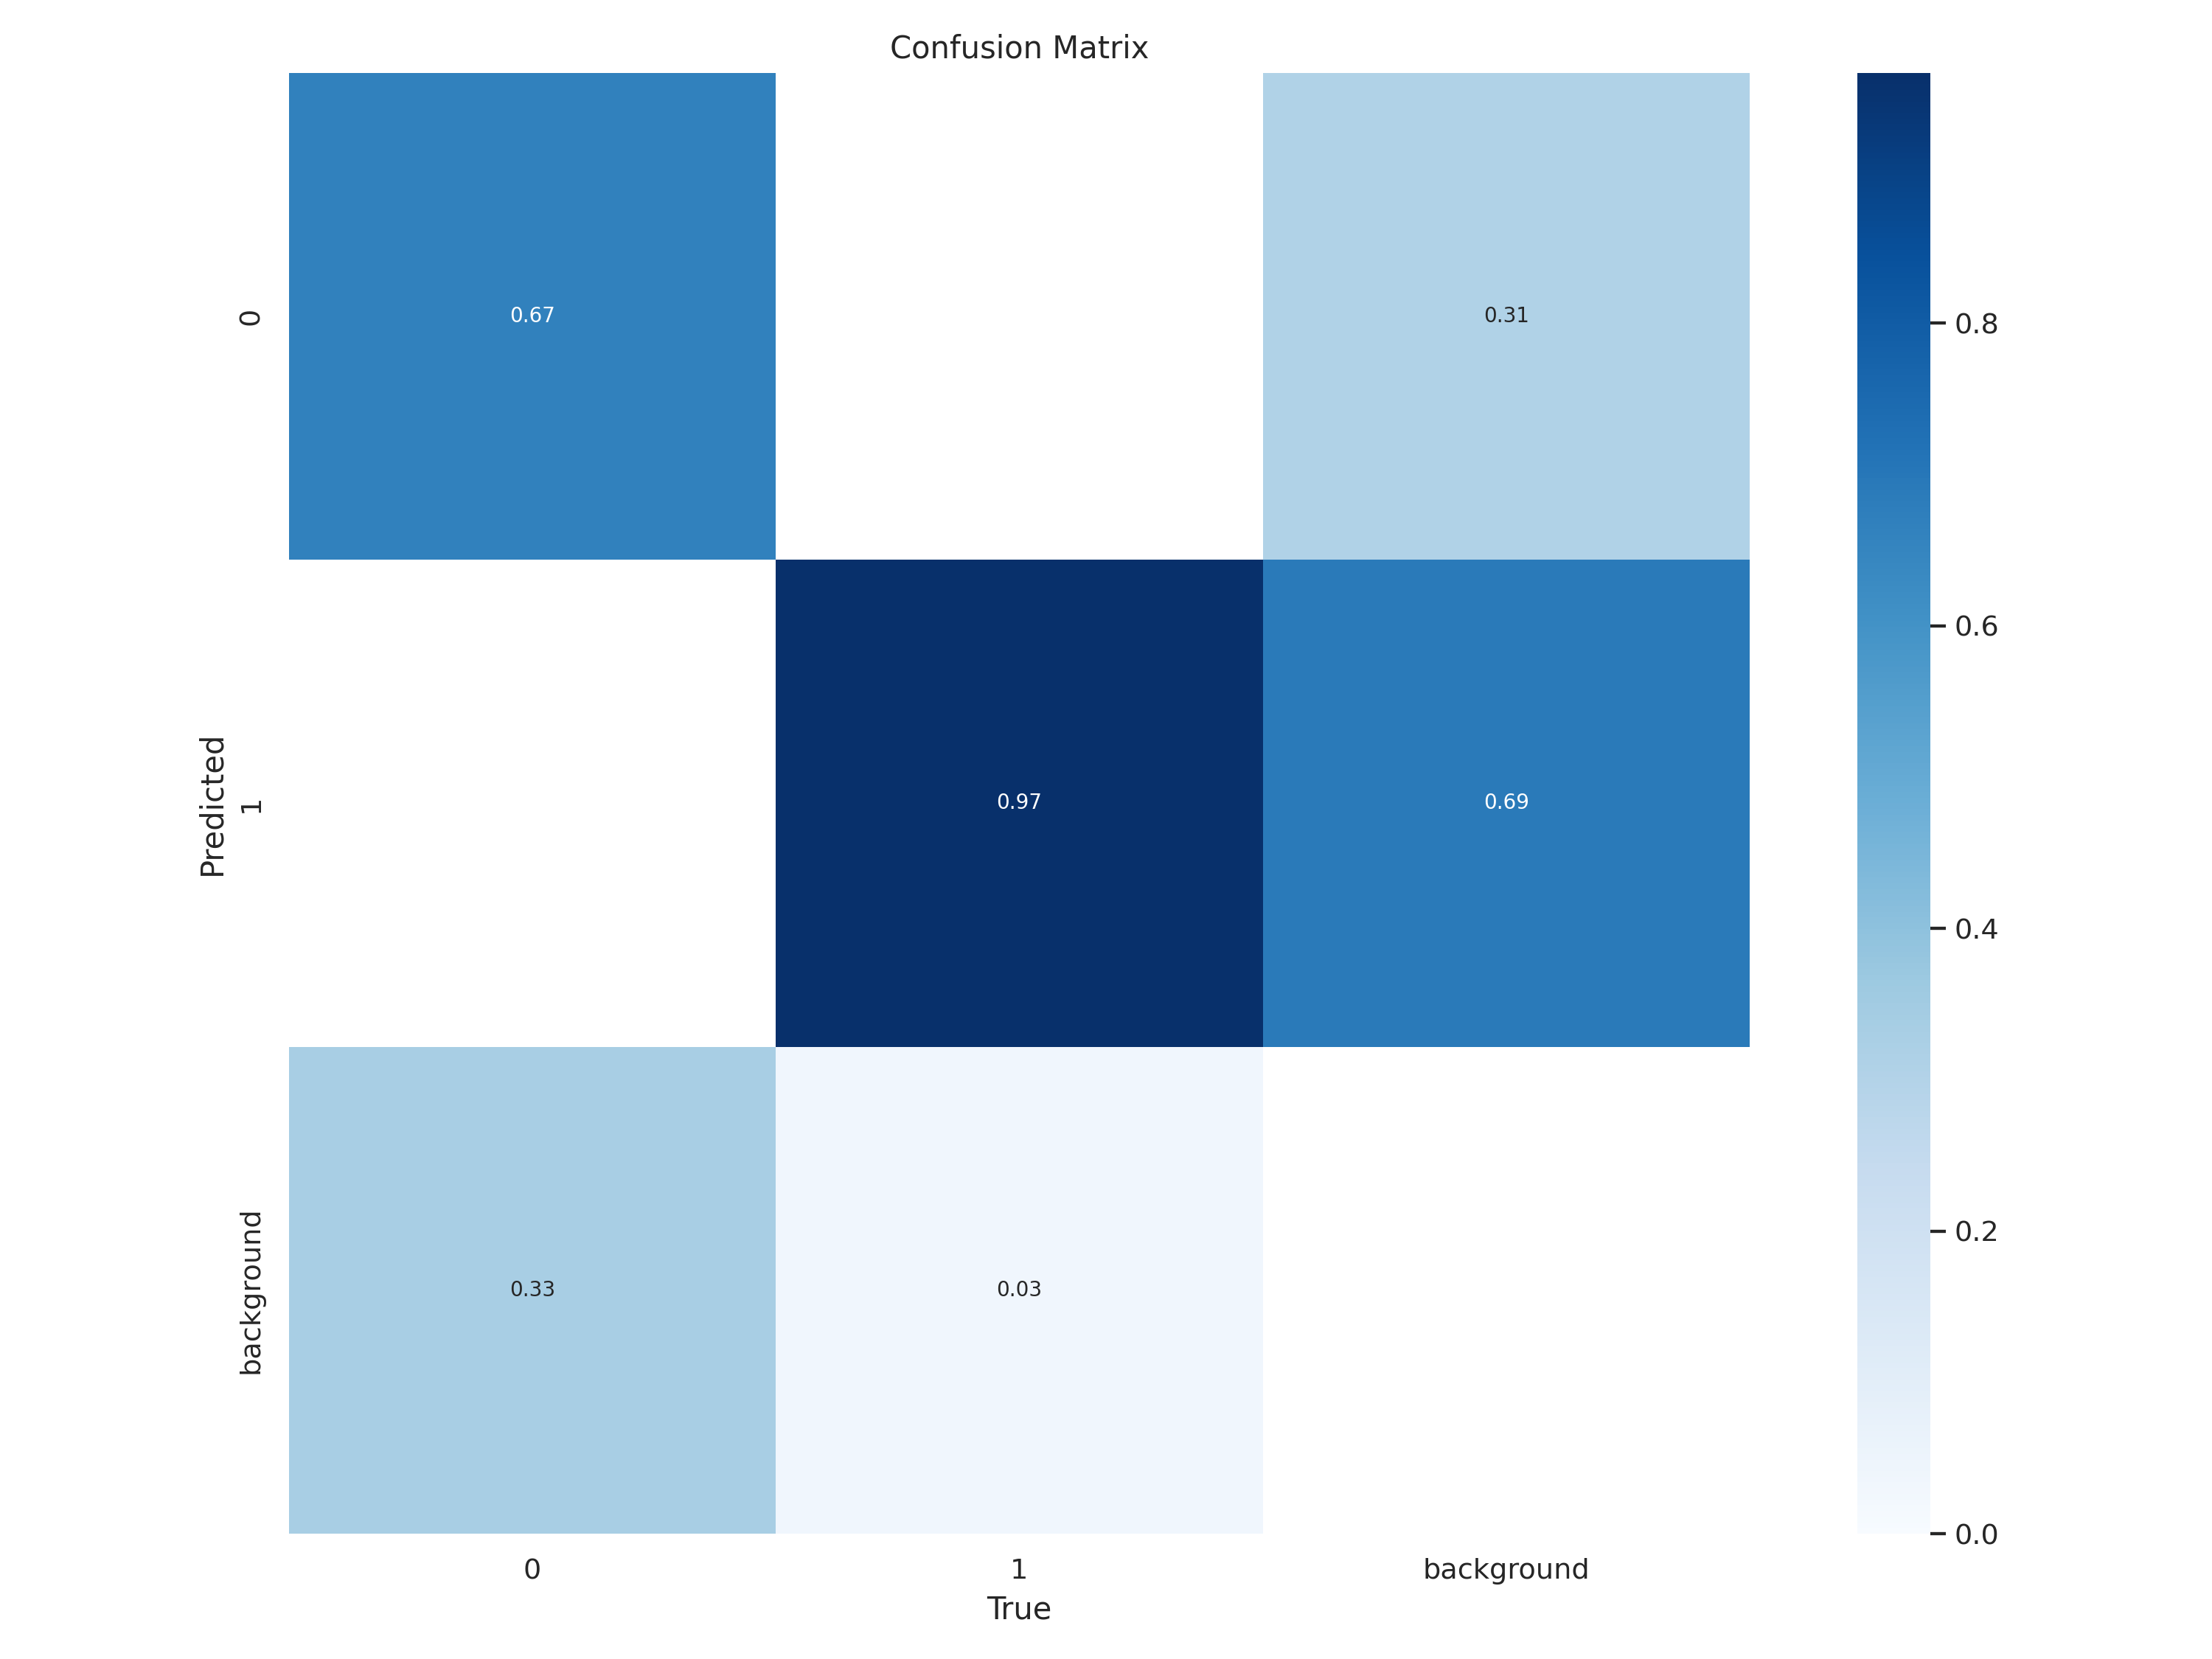

In [18]:
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/Fire_detection/confusion_matrix.png", width = 600)

/content


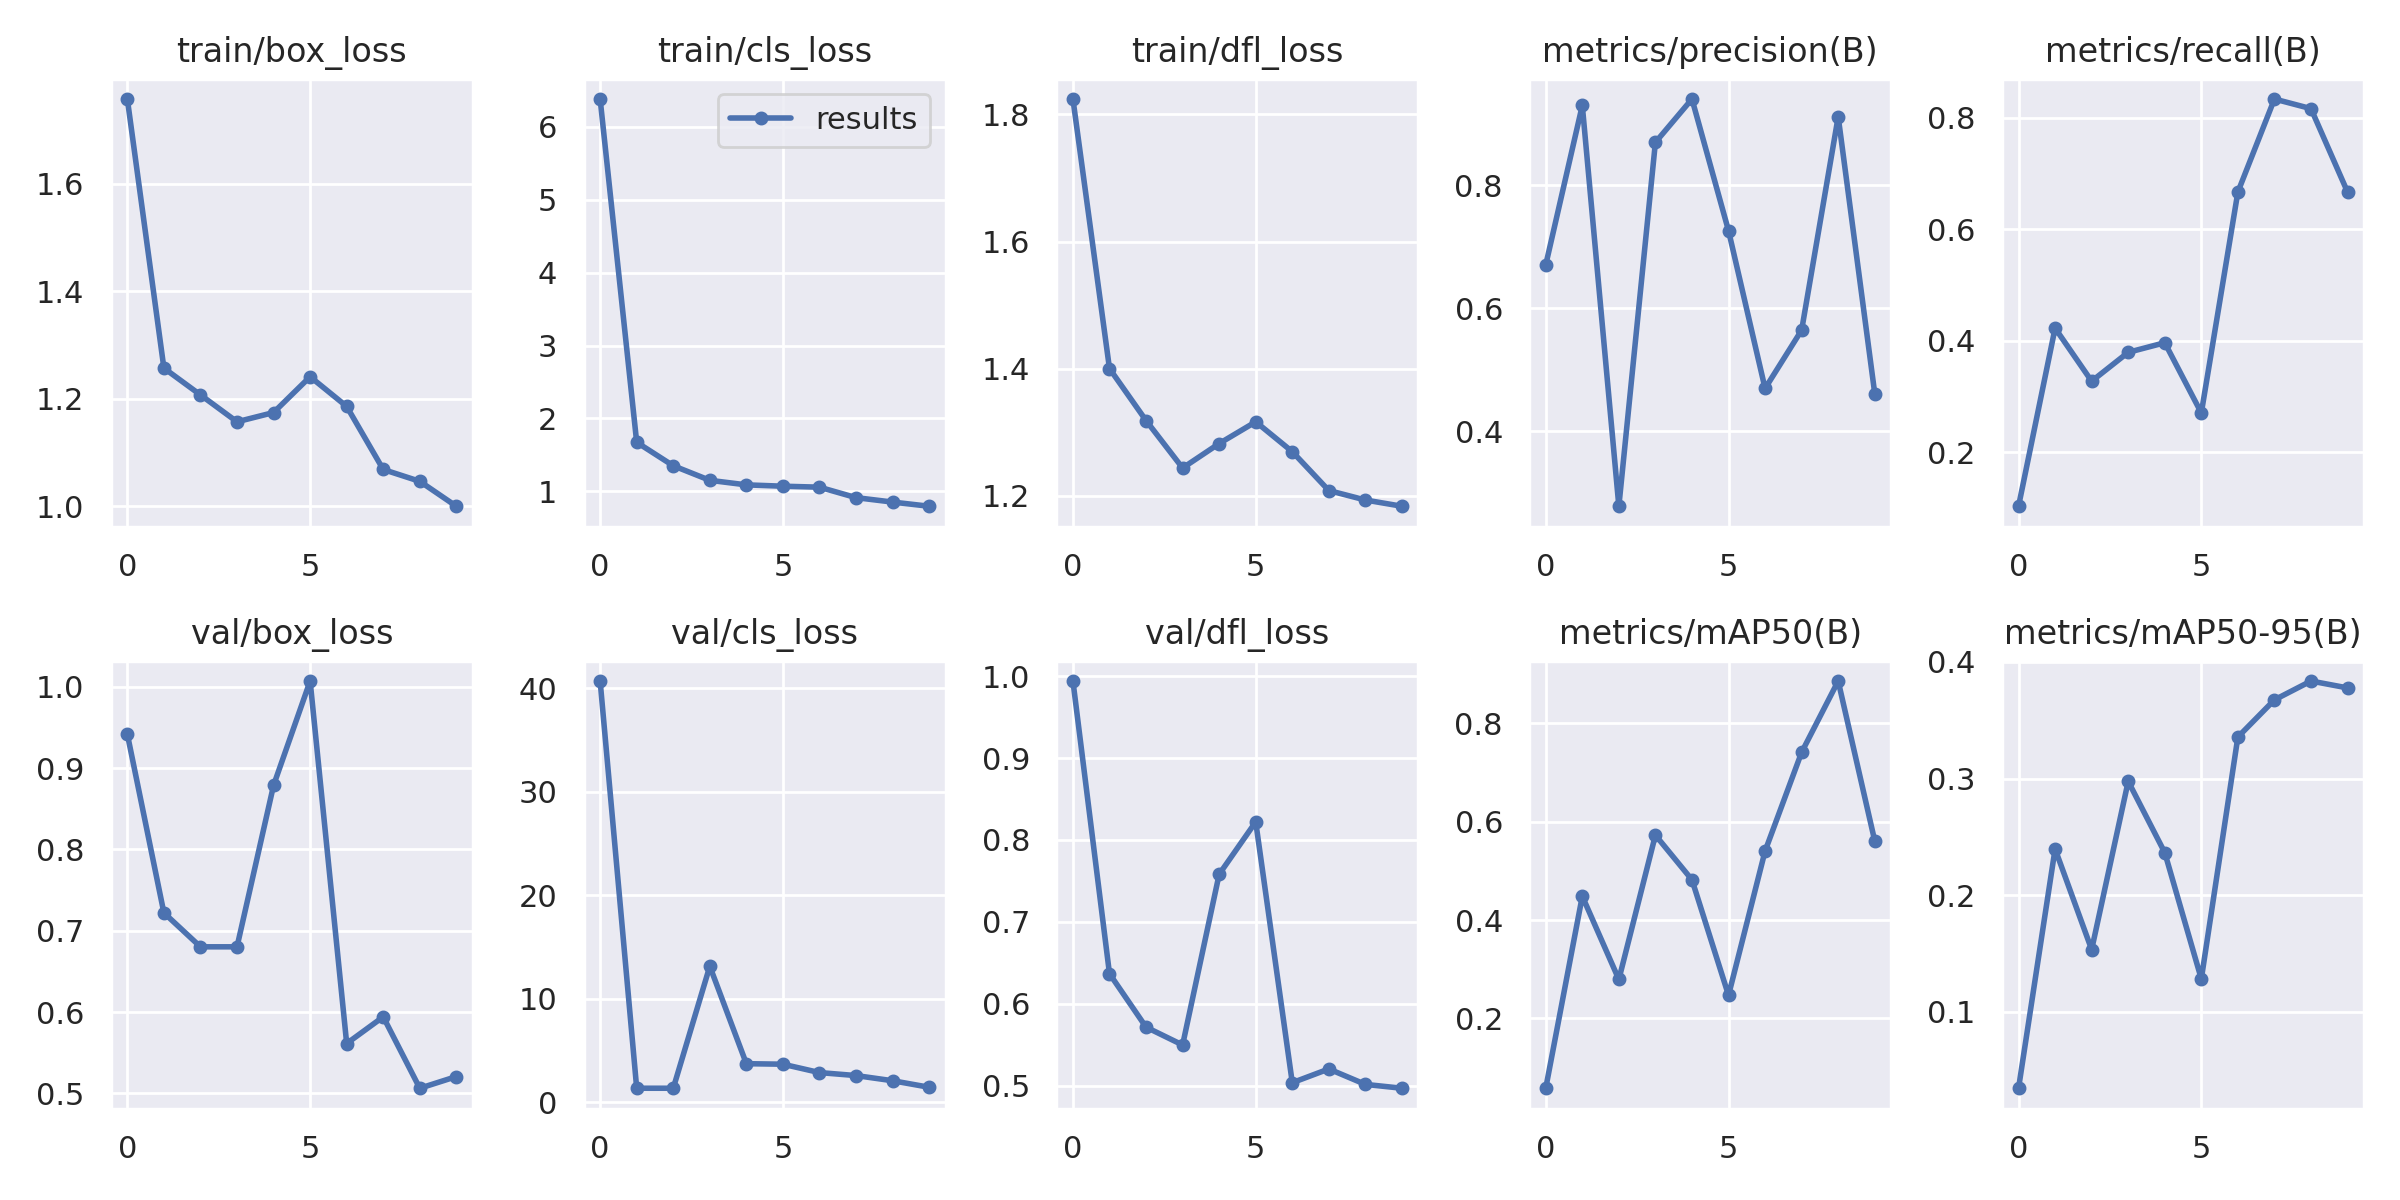

In [19]:
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/Fire_detection/results.png", width = 600)

/content


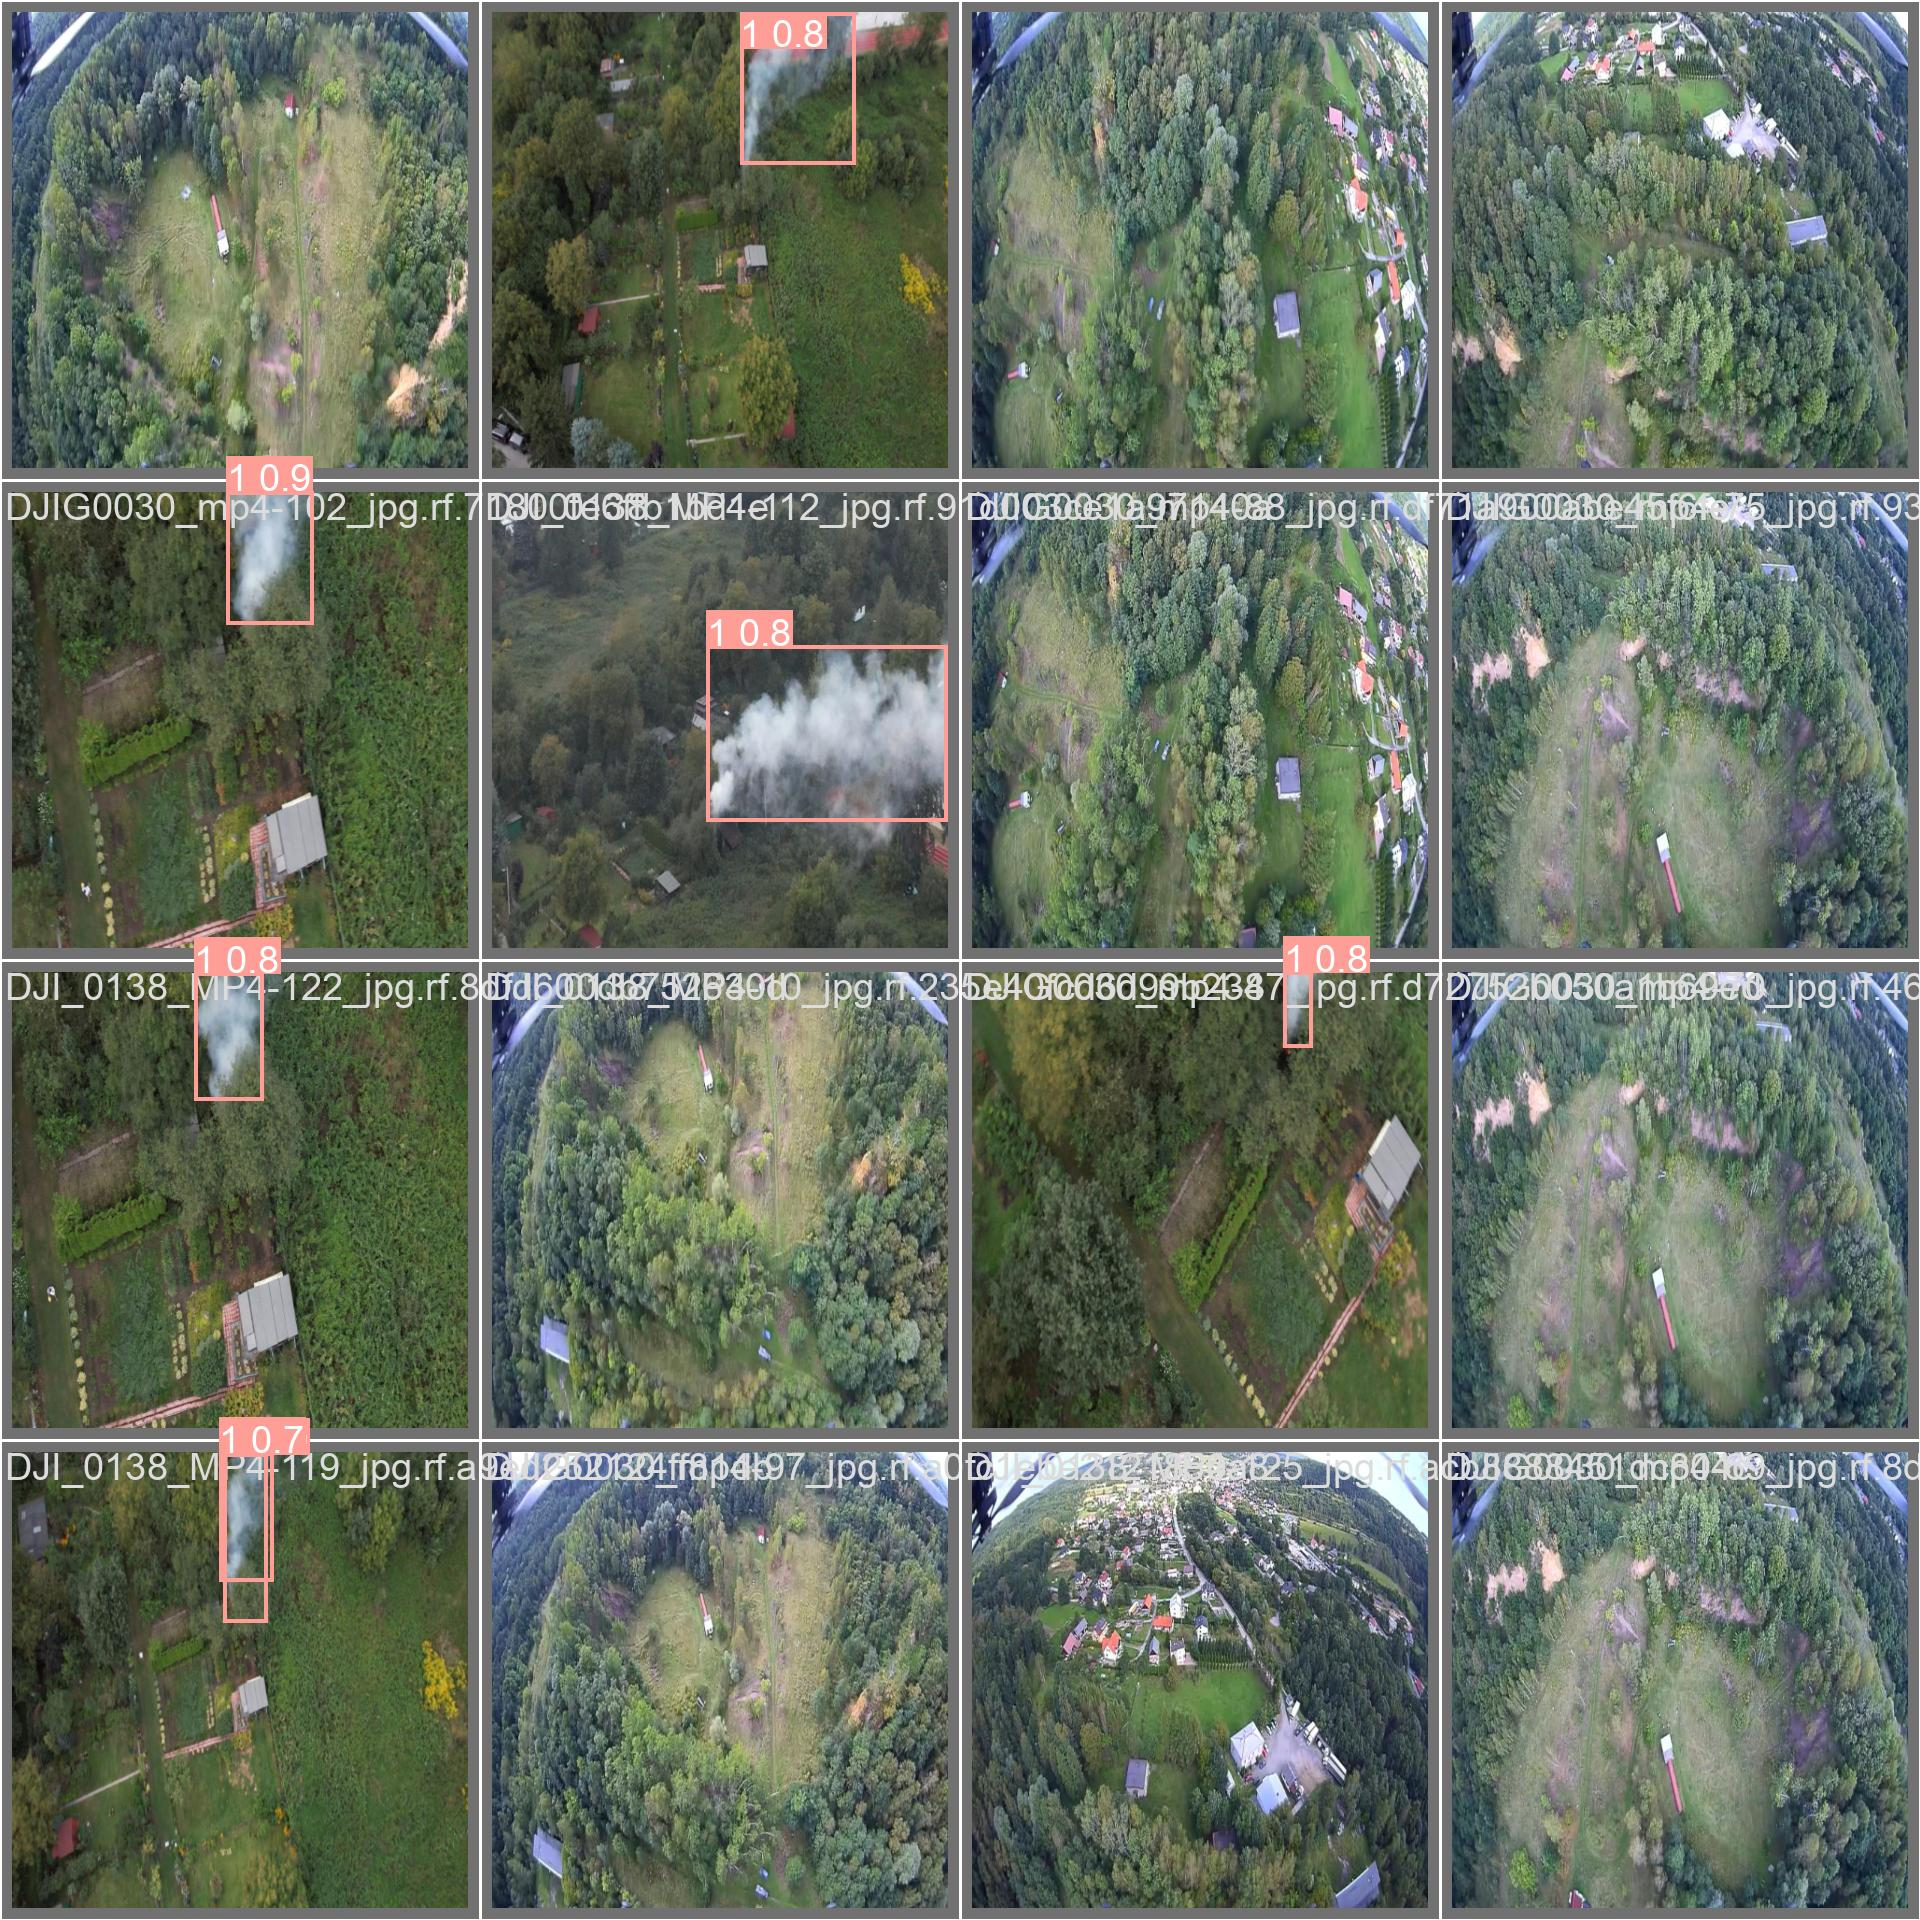

In [20]:
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/Fire_detection/val_batch0_pred.jpg", width = 600)

In [21]:
%cd {HOME}
!yolo task=detection mode=predict model={HOME}/runs/detect/Fire_detection/weights/best.pt conf=0.25 source=/content/datasets/fire-detection-small-1/test/images save=True

/content
2024-05-30 12:15:53.697015: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 12:15:53.697078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 12:15:53.698533: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 12:15:53.706320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 12:15:55.058776: W tensorflow/com

In [22]:
import glob
for im_path in glob.glob(f"/content/runs/detection/fire_detection_predict/*.jpg")[:1]:
  display(Image(filename = im_path, width = 600))
  print("\n")